In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import string

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
gender=pd.read_csv('gender_submission.csv')

In [4]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Greenberg, Mr. Samuel",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.00,0,0,A/5 3594,8.0500,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.00,1,5,347082,31.2750,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.00,0,0,C.A. 18723,10.5000,NaN,S


In [8]:
# Numerical->Age, fare, sibsp,parch
# Categorical->survived,sex,pclass,embarked
# Alphanumeric->ticket,cabin

In [9]:
train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#For sex

In [12]:
print('Percentage of females who survived:',train['Survived'][train['Sex']=='female'].value_counts(normalize=True)[1]*100)

Percentage of females who survived: 74.20382165605095


In [13]:
print('Percentage of males who survived:',train['Survived'][train['Sex']=='male'].value_counts(normalize=True)[1]*100)

Percentage of males who survived: 18.890814558058924


In [14]:
#train[train['Survived']==0][train['Pclass']==3]
## Pclass

In [15]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [16]:
print(train["Survived"][train["Pclass"] == 1].value_counts(normalize=True)[1]*100)
print(train["Survived"][train["Pclass"] == 2].value_counts(normalize=True)[1]*100)
print(train["Survived"][train["Pclass"] == 3].value_counts(normalize=True)[1]*100)

62.96296296296296
47.28260869565217
24.236252545824847


In [17]:
#SibSp Feature
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

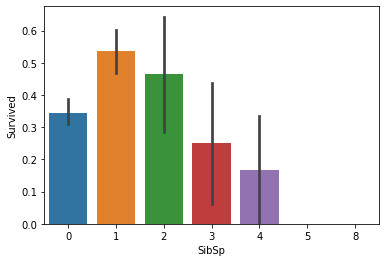

In [18]:
sns.barplot(x='SibSp',y='Survived',data=train)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

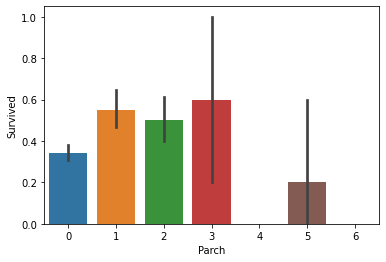

In [19]:
#Parch
sns.barplot(x="Parch", y="Survived", data=train)


In [20]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [21]:
train_corr = train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()

In [22]:
train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
train_corr[train_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
5,Age,Age,1.000000
12,Age,Pclass,0.369226
16,Age,SibSp,0.308247
21,Age,Parch,0.189119
26,Age,Fare,0.096067
31,Age,Survived,0.077221
36,Age,PassengerId,0.036847


In [23]:
# https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial
# https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner

In [24]:
train['Age']=train.groupby(['Sex','Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))

In [25]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
# train.drop(['Cabin'],axis=1,inplace=True)
# train.drop(['Ticket'],axis=1,inplace=True)

In [27]:
#Embarked
train[train['Embarked'].isnull()]
print(train['Embarked'].unique())

['S' 'C' 'Q' nan]


In [28]:
print(train[train['Embarked']=="S"].shape[0])
print(train[train['Embarked']=="C"].shape[0])
print(train[train['Embarked']=="Q"].shape[0])

644
168
77


In [29]:
train = train.fillna({"Embarked": "S"})

In [30]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [31]:
#med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
train[train['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
train_corr2=train.drop(['PassengerId'],axis=1).corr().abs().unstack().sort_values(kind='quicksort',ascending=False).reset_index()
train_corr2.rename(columns={'level_0':'Feature 1','level_1':'Feature 2',0:'Correlation Coefficient'},inplace=True)


In [34]:
train_corr2.drop(train_corr2.iloc[1::2].index,inplace=True)

In [35]:
train_corr2_fn=train_corr2.drop(train_corr2[train_corr2['Correlation Coefficient']==1].index)

In [36]:
train_corr2_fn

,Feature 1,Feature 2,Correlation Coefficient
6,Fare,Pclass,0.549500
8,Parch,SibSp,0.414838
10,Pclass,Age,0.413583
12,Survived,Pclass,0.338481
14,Survived,Fare,0.257307
16,Age,SibSp,0.249854
18,Fare,Parch,0.216225
20,Age,Parch,0.175526
22,Fare,SibSp,0.159651
24,Fare,Age,0.122692


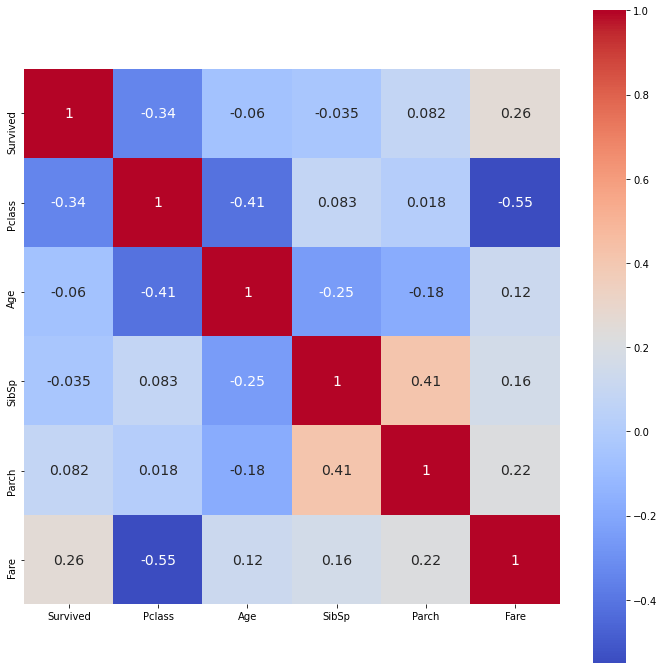

In [37]:
plt.figure(figsize=(12,12))
sns.heatmap(train.drop(['PassengerId'],axis=1).corr(),annot=True,square=True,cmap='coolwarm',annot_kws={'size':14})
plt.show()

In [38]:
cont_features=['Age','Fare']
surv=train['Survived']==1

C:\Users\ufukk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ufukk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ufukk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-leve

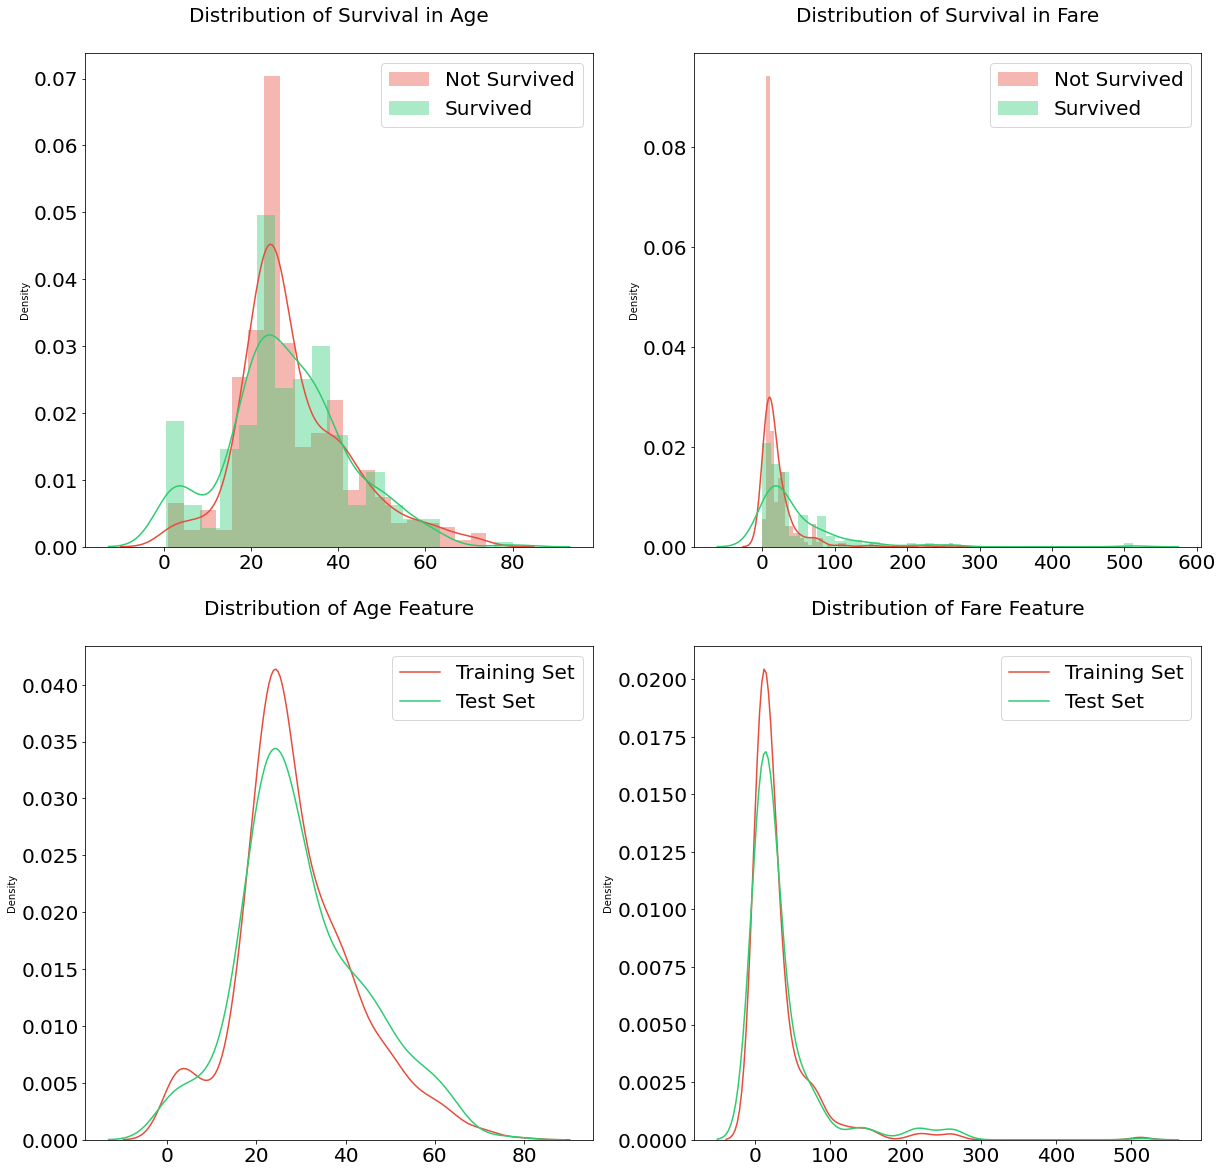

In [39]:
fig,axs=plt.subplots(2,2,figsize=(20,20))
for i,feature in enumerate(cont_features):
    sns.distplot(train[~surv][feature],label='Not Survived',hist=True,color='#e74c3c', ax=axs[0][i])
    sns.distplot(train[surv][feature], label='Survived', hist=True, color='#2ecc71', ax=axs[0][i])
    sns.distplot(train[feature], label='Training Set', hist=False, color='#e74c3c', ax=axs[1][i])
    sns.distplot(test[feature], label='Test Set', hist=False, color='#2ecc71', ax=axs[1][i])
    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')
    
    for j in range(2):        
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
    
    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Distribution of Survival in {}'.format(feature), size=20, y=1.05)

axs[1][0].set_title('Distribution of {} Feature'.format('Age'), size=20, y=1.05)
axs[1][1].set_title('Distribution of {} Feature'.format('Fare'), size=20, y=1.05)
        
plt.show()

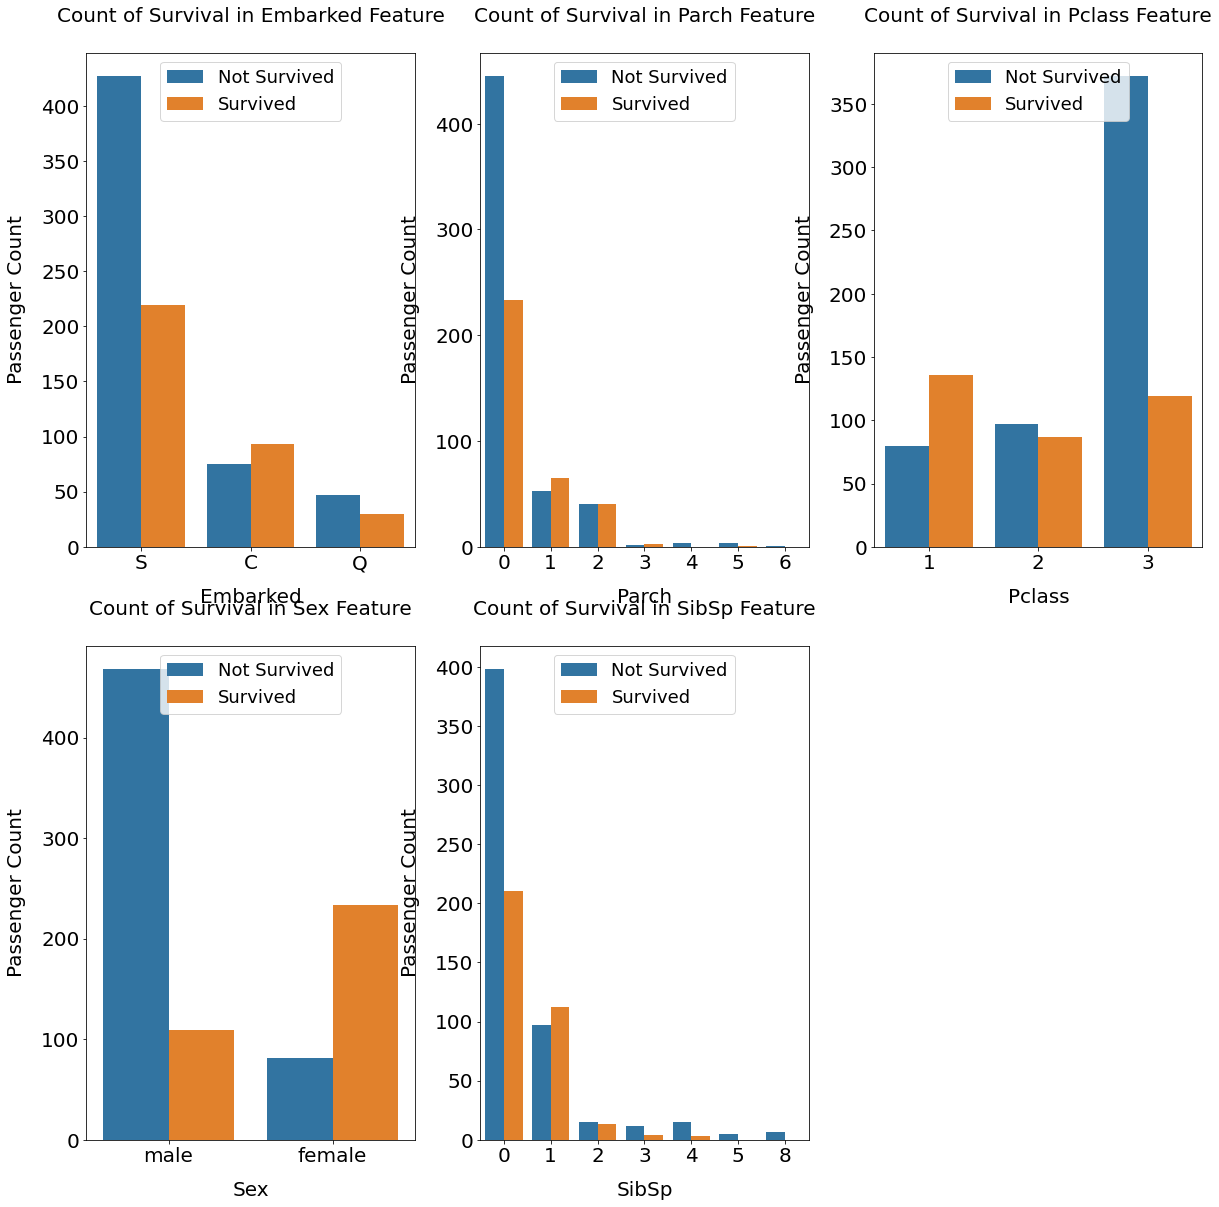

In [40]:
cat_features=['Embarked','Parch','Pclass','Sex','SibSp']
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))

for i,feature in enumerate(cat_features,1):
    plt.subplot(2,3,i)
    sns.countplot(x=feature,hue='Survived',data=train)
    plt.xlabel('{}'.format(feature),size=20,labelpad=15)
    plt.ylabel('Passenger Count',size=20,labelpad=15)
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

In [52]:
all_df=pd.concat([train,test],sort=True).reset_index(drop=True)

In [53]:
all_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


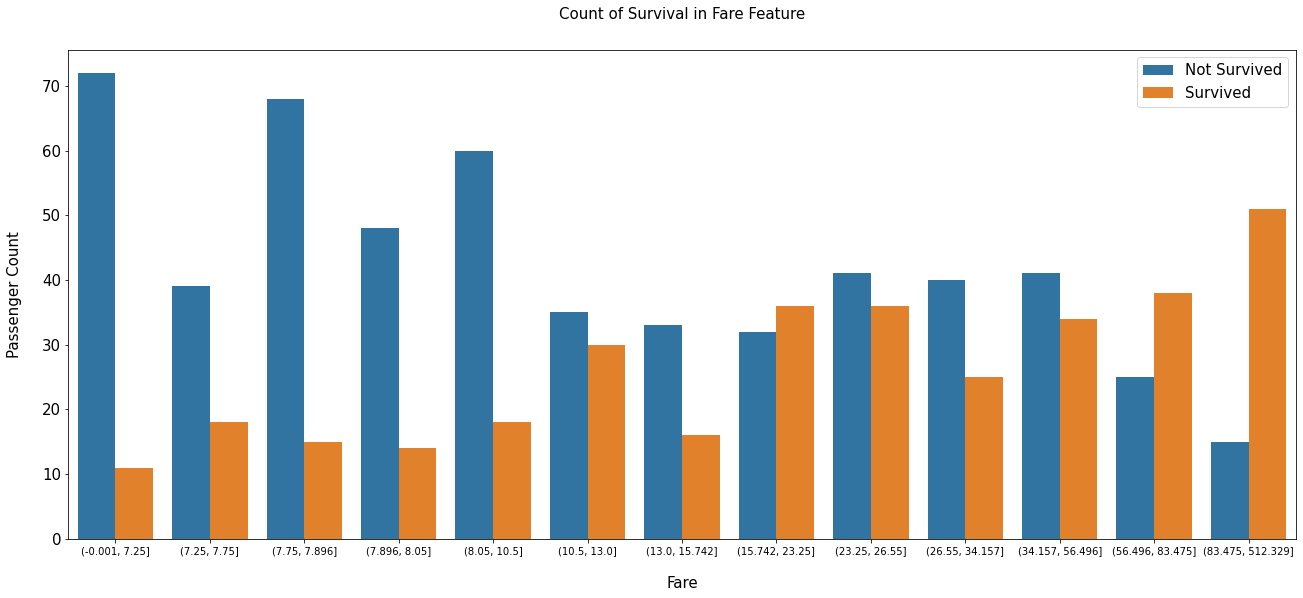

In [43]:
all_df['Fare']=pd.qcut(all_df['Fare'],13)
fig,axs=plt.subplots(figsize=(22,9))
sns.countplot(x='Fare',hue='Survived',data=all_df)
plt.xlabel('Fare',size=15,labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=15)
plt.legend(['Not Survived','Survived'],loc='upper right',prop={'size':15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

In [44]:
all_df['Age'] = pd.qcut(all_df['Age'], 10)

In [71]:
all_df['Title'] = all_df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
all_df['Is_Married'] = 0
all_df['Is_Married'].loc[all_df['Title'] == 'Mrs'] = 1

C:\Users\ufukk\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [68]:
#all_df.loc[all_df.Title=='Mr','Is_Married']=1

In [72]:
all_df['Is_Married']

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: Is_Married, Length: 1309, dtype: int64

In [73]:
all_df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Is_Married
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,Mr,0
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,Dona,0
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,Mr,0
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,Mr,0


In [74]:
def ex_family(data):
    families=[]
    for i in range(len(data)):
        name=data.iloc[i]
        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families

all_df['Family'] = ex_family(all_df['Name'])





In [78]:
all_df['Family']=ex_family(all_df['Name'])

In [79]:
all_df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Is_Married,Family
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,0,Braund
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1,Cumings
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0,Heikkinen
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1,Futrelle
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,Mr,0,Spector
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,Dona,0,Oliva y Ocana
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,Mr,0,Saether
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,Mr,0,Ware


In [80]:
all_df.loc[890:]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Is_Married,Family
890,32.0,NaN,Q,7.7500,"Dooley, Mr. Patrick",0,891,3,male,0,0.0,370376,Mr,0,Dooley
891,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911,Mr,0,Kelly
892,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272,Mrs,1,Wilkes
893,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276,Mr,0,Myles
894,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154,Mr,0,Wirz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,Mr,0,Spector
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,Dona,0,Oliva y Ocana
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,Mr,0,Saether
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,Mr,0,Ware


In [115]:
all_df['Family_Size'] = all_df['SibSp'] + all_df['Parch'] + 1
df_train = all_df.loc[:890]
df_test = all_df.loc[891:]

In [116]:
df_train.groupby('Family')['Survived','Family'].median()

<ipython-input-116-8a122a5fe319>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_train.groupby('Family')['Survived','Family'].median()


,Survived
Family,
Abbing,0.0
Abbott,0.5
Abelson,0.5
Adahl,0.0
Adams,0.0
...,...
de Mulder,1.0
de Pelsmaeker,0.0
del Carlo,0.0


In [117]:
non_unique_families=[x for x in df_train['Family'].unique() if x in df_test['Family'].unique()]
df_family_survival_rate = df_train.groupby('Family')['Survived', 'Family','Family_Size'].median()
family_rates = {}
for i in range(len(df_family_survival_rate)):
    # Checking a family exists in both training and test set, and has members more than 1
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]

<ipython-input-117-36e0a8496615>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_family_survival_rate = df_train.groupby('Family')['Survived', 'Family','Family_Size'].median()


In [118]:
mean_survival_rate = np.mean(df_train['Survived'])

In [119]:
train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[df_train['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
for i in range(len(df_test)):
    if df_test['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[df_test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        
df_train['Family_Survival_Rate'] = train_family_survival_rate
df_train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
df_test['Family_Survival_Rate'] = test_family_survival_rate
df_test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

<ipython-input-119-6b1e8d8ddc4a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Family_Survival_Rate'] = train_family_survival_rate
<ipython-input-119-6b1e8d8ddc4a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
<ipython-input-119-6b1e8d8ddc4a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [121]:
df_train

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Is_Married,Family,Family_Size,Family_Survival_Rate,Family_Survival_Rate_NA
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,0,Braund,2,0.383838,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1,Cumings,2,1.000000,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0,Heikkinen,1,0.383838,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1,Futrelle,2,0.383838,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0,Allen,1,0.383838,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536,Rev,0,Montvila,1,0.383838,0
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053,Miss,0,Graham,1,0.383838,0
888,21.5,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0.0,W./C. 6607,Miss,0,Johnston,4,0.000000,1
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1.0,111369,Mr,0,Behr,1,0.383838,0


In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold